Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7791 - loss: 0.6056 - val_accuracy: 0.8487 - val_loss: 0.4212
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8690 - loss: 0.3546 - val_accuracy: 0.8633 - val_loss: 0.3686
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8841 - loss: 0.3108 - val_accuracy: 0.8729 - val_loss: 0.3479
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8906 - loss: 0.2852 - val_accuracy: 0.8768 - val_loss: 0.3293
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8987 - loss: 0.2643 - val_accuracy: 0.8754 - val_loss: 0.3395
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9056 - loss: 0.2485 - val_accuracy: 0.8872 - val_loss: 0.3147
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9094 - loss: 0.2366 - val_accuracy: 0.8797 - val_loss: 0.3338
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9141 - loss: 0.2218 - 

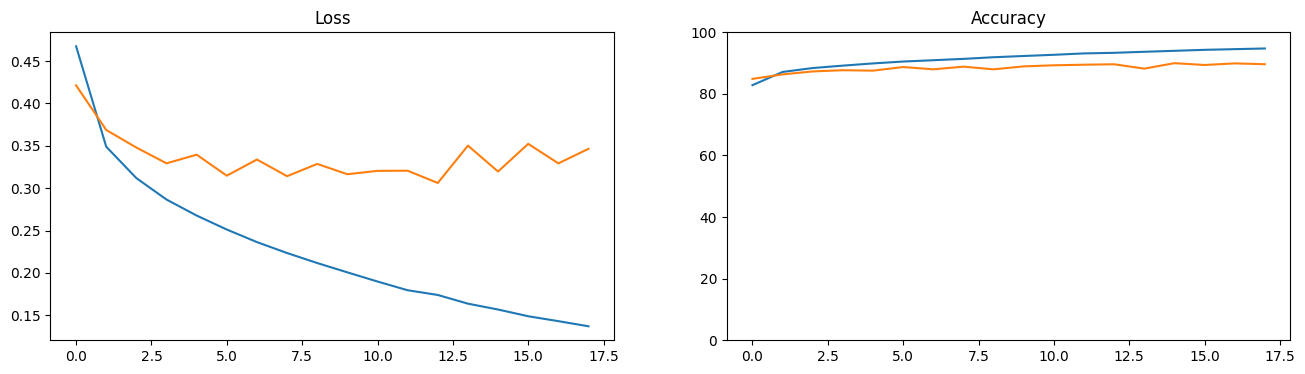

In [15]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def plot_history(hst):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.show()

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train_data = train_data / 255
test_data = test_data / 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(784, activation='relu'),
    layers.Dense(392, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=20, batch_size=40, validation_data=(test_data, test_labels), callbacks=[early_stopping], verbose=1)

test_loss, test_accuracy = model.evaluate(test_data, test_labels)

print("Точність на тестових данних, Accuracy:", test_accuracy,"Loss:", test_loss)

plot_history(history)